# Comparison of CVO-QRAM using different multi-controlled gate implementations
### Section 4 (Figure 12)

In [1]:
import matplotlib.pyplot as plt
import qiskit

from qclib.state_preparation import CvoqramInitialize
from qclib.util import double_sparse

In [2]:
# Number of nonzero amplitudes = $2^s$
# p = probability of 1s in binary strings

n_qubits = [6, 7, 8, 9, 10, 11, 12]
s = 4
p = 0.2
repetitions = 30

In [27]:
def compute_avg_cnot_count(n_qubits, s, p, repetitions, optimization_level=0, use_aux=False):

    cnots_cvoqram = []
    cnots_cvoqram_linear = []
    cnots_cvoqram_barenco = []
    for n in n_qubits:

        cx_cvoqram = 0
        cx_cvoqram_linear = 0
        cx_cvoqram_barenco = 0
        for k in range(repetitions):
            data = double_sparse(n, s, p)

            qc_cvoqram = CvoqramInitialize(data, opt_params={'with_aux':False, 'mcg_method':'qiskit'}).definition
            qc_cvoqram_linear = CvoqramInitialize(data, opt_params={'with_aux':False, 'mcg_method':'linear'}).definition
            qc_cvoqram_barenco = CvoqramInitialize(data, opt_params={'with_aux':False, 'mcg_method':'barenco'}).definition

            qc_cvoqram = qiskit.transpile(qc_cvoqram, basis_gates=['u','cx'], optimization_level=optimization_level)
            qc_cvoqram_linear = qiskit.transpile(qc_cvoqram_linear, basis_gates=['u','cx'], optimization_level=optimization_level)
            qc_cvoqram_barenco = qiskit.transpile(qc_cvoqram_barenco, basis_gates=['u','cx'], optimization_level=optimization_level)

            cx_cvoqram = cx_cvoqram + qc_cvoqram.count_ops()['cx']
            cx_cvoqram_linear = cx_cvoqram_linear + qc_cvoqram_linear.count_ops()['cx']
            cx_cvoqram_barenco = cx_cvoqram_barenco + qc_cvoqram_barenco.count_ops()['cx']

        cnots_cvoqram.append(cx_cvoqram / repetitions)
        cnots_cvoqram_linear.append(cx_cvoqram_linear / repetitions)
        cnots_cvoqram_barenco.append(cx_cvoqram_barenco / repetitions)
    return cnots_cvoqram, cnots_cvoqram_barenco, cnots_cvoqram_linear

In [32]:
(cnots_cvoqram_opt0,
 cnots_cvoqram_barenco_opt0,
 cnots_cvoqram_linear_opt0) = compute_avg_cnot_count(n_qubits, s, p, repetitions, optimization_level=0)

(cnots_cvoqram_opt1,
 cnots_cvoqram_barenco_opt1,
 cnots_cvoqram_linear_opt1) = compute_avg_cnot_count(n_qubits, s, p, repetitions, optimization_level=1)

(cnots_cvoqram_opt2,
 cnots_cvoqram_barenco_opt2,
 cnots_cvoqram_linear_opt2) = compute_avg_cnot_count(n_qubits, s, p, repetitions, optimization_level=2)

(cnots_cvoqram_opt3,
 cnots_cvoqram_barenco_opt3,
 cnots_cvoqram_linear_opt3) = compute_avg_cnot_count(n_qubits, s, p, repetitions, optimization_level=3)

#### No optimization

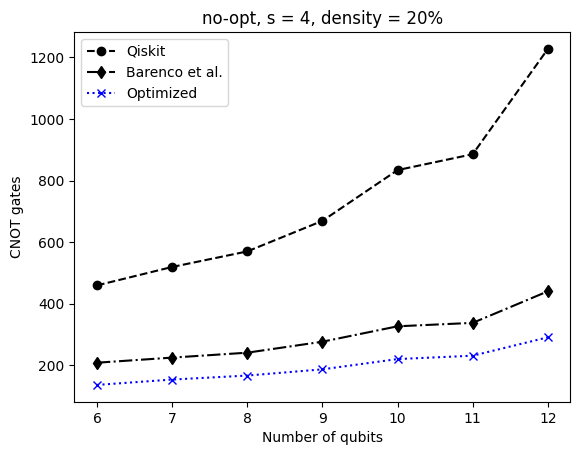

In [56]:
plt.plot(n_qubits, cnots_cvoqram_opt0, color='black', marker="o", linestyle='--', label='Qiskit')
plt.plot(n_qubits, cnots_cvoqram_barenco_opt0, color='black', marker="d", linestyle='-.', label='Barenco et al.')
plt.plot(n_qubits, cnots_cvoqram_linear_opt0, color='blue', marker="x", linestyle=':', label='Optimized')
plt.xlabel('Number of qubits')
plt.ylabel('CNOT gates')
plt.title('no-opt, s = {}, density = {}%'.format(s, int(p*100)))
plt.legend()
plt.savefig("no-opt.pdf")
plt.show()

#### Optimziation level 1

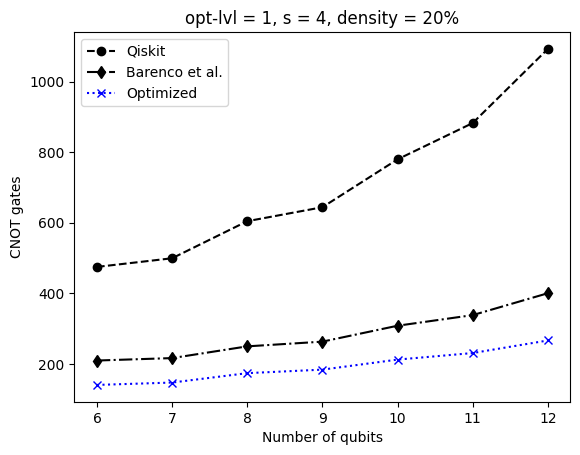

In [57]:
plt.plot(n_qubits, cnots_cvoqram_opt1, color='black', marker="o", linestyle='--', label='Qiskit')
plt.plot(n_qubits, cnots_cvoqram_barenco_opt1, color='black', marker="d", linestyle='-.', label='Barenco et al.')
plt.plot(n_qubits, cnots_cvoqram_linear_opt1, color='blue', marker="x", linestyle=':', label='Optimized')
plt.xlabel('Number of qubits')
plt.ylabel('CNOT gates')
plt.title('opt-lvl = 1, s = {}, density = {}%'.format(s, int(p*100)))
plt.legend()
plt.savefig("opt-lvl-1.pdf")
plt.show()

#### Optimization level 2

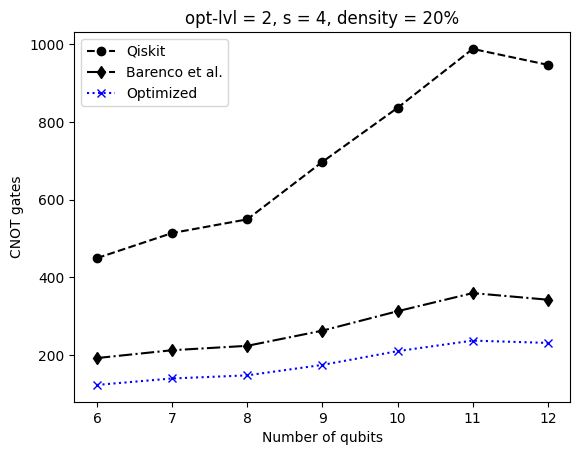

In [58]:
plt.plot(n_qubits, cnots_cvoqram_opt2, color='black', marker="o", linestyle='--', label='Qiskit')
plt.plot(n_qubits, cnots_cvoqram_barenco_opt2, color='black', marker="d", linestyle='-.', label='Barenco et al.')
plt.plot(n_qubits, cnots_cvoqram_linear_opt2, color='blue', marker="x", linestyle=':', label='Optimized')
plt.xlabel('Number of qubits')
plt.ylabel('CNOT gates')
plt.title('opt-lvl = 2, s = {}, density = {}%'.format(s, int(p*100)))
plt.legend()
plt.savefig("opt-lvl-2.pdf")
plt.show()

#### Optimization level 3

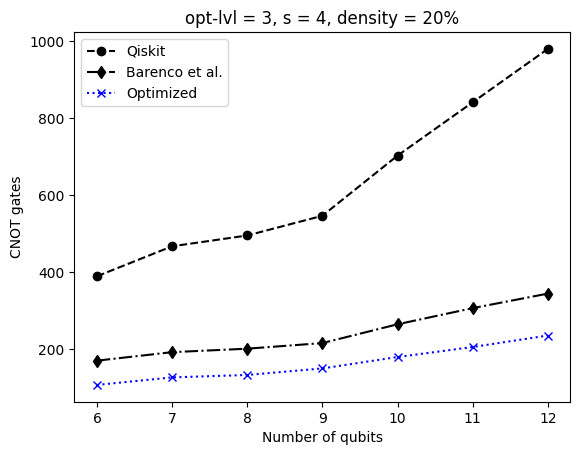

In [59]:
plt.plot(n_qubits, cnots_cvoqram_opt3, color='black', marker="o", linestyle='--', label='Qiskit')
plt.plot(n_qubits, cnots_cvoqram_barenco_opt3, color='black', marker="d", linestyle='-.', label='Barenco et al.')
plt.plot(n_qubits, cnots_cvoqram_linear_opt3, color='blue', marker="x", linestyle=':', label='Optimized')
plt.xlabel('Number of qubits')
plt.ylabel('CNOT gates')
plt.title('opt-lvl = 3, s = {}, density = {}%'.format(s, int(p*100)))
plt.legend()
plt.savefig("opt-lvl-3.pdf")
plt.show()